<a href="https://colab.research.google.com/github/Timothydatasciencegit/Data-Science-Code/blob/main/Sea_Level_predictor_freeCodeCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sea_df = pd.read_csv('/content/drive/MyDrive/epa-sea-level.csv') #read in and check the data
sea_df.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [10]:
def draw_plot(df):
  y = df['CSIRO Adjusted Sea Level'] #Use adjusted sea level as y axis
  x =  df['Year'] #Use year as x axis

  #Scatterplot
  fig, ax = plt.subplots()
  plt.scatter(x, y)

  #First line of best fit
  res = linregress(x, y)
  print(res) #Print line regression result
  x_pred = pd.Series([i for i in range(1880,2050)]) #include 1880 to 2050
  y_pred = res.slope*x_pred + res.intercept #y = mx+b (slope of a line)
  plt.plot(x_pred, y_pred, 'r')

  #Second line of best fit
  df2 = df.loc[df['Year'] >= 2000] #Use data points where year is greater than 2000
  x2 = df2['Year'] #new y to the year
  y2 = df2['CSIRO Adjusted Sea Level'] #new x to  Sea level
  res2 = linregress(x2, y2)
  x_pred2 = pd.Series([i for i in range(2000,2050)]) #include 2000 to 2050
  y_pred2 = res2.slope*x_pred2 + res2.intercept
  plt.plot(x_pred2, y_pred2, 'blue')



  #Titles and Labels
  ax.set_xlabel('Year') #Add x-label to the axes
  ax.set_ylabel('Sea Level (inches)') #Add a y-label to the axes
  ax.set_title('Rise in Sea Level') #Add title


LinregressResult(slope=0.0630445840121348, intercept=-119.06594196773978, rvalue=0.984757131182585, pvalue=3.7886969791131554e-102, stderr=0.000969211871328715, intercept_stderr=1.8869433812425225)


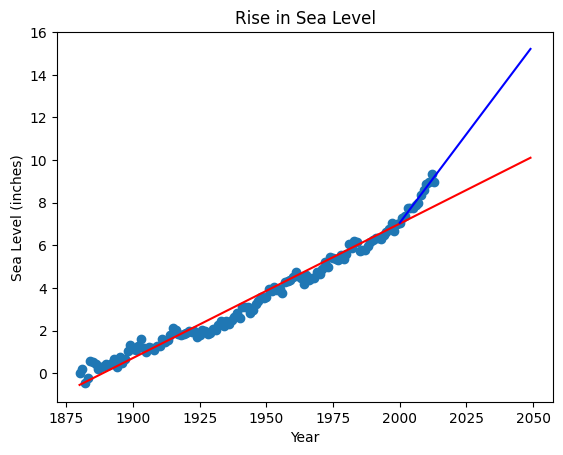

In [11]:
draw_plot(sea_df)